<h1 align='center'> SVD Applied to Graph Theory</h1>

We're going to look at two examples -- Spectral Clustering and the PageRank algorithm (next set of examples)

First, we __import__ our usual packages.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

from numpy import diag, array, matrix, pi, sqrt, set_printoptions
from scipy import linalg

set_printoptions(precision = 5, suppress = True)

Next, we import __networkx__ for graph theory and the __DataFrame__ class from __pandas__ which produces a nice visual display of a matrix (especially once we pass it our custom format __fmt__ function). 

In [2]:
import networkx as nx

from pandas import DataFrame, set_option
def fmt(x):
    if( abs(x) < 1e-8):
        return '0'
    x = complex(x)
    if( abs(x.imag ) < 1e-8 ) :
        return '%.5f' % x.real
    elif( abs(x.real) < 1e-8) :
        return '%.5fj'% x.imag
    else:
        return '%.5f+%.5fj' % (x.real, x.imag)

set_option('display.float_format',fmt) 

##  Also, going to ignore deprecation warnings
import warnings
warnings.simplefilter("ignore")

<p>&nbsp;</p>

## The Laplacian Matrix 

The next cell defines a __networkx__ __Graph__ object __G__ which is stored within the notebook itself.  

In [3]:
G = nx.Graph({   'LISA' : ['KYLE', 'JOHN'],
                 'MARY' : ['PAT', 'MAC', 'AL', 'JAN'],
                 'AL' : ['MAC', 'MARY'],
                 'JAN' : ['MAC', 'MARY'],
                 'KYLE' : ['BETH', 'JOHN', 'AMY', 'SAM', 'LISA'],
                 'MAC' : ['MARY', 'AL', 'JAN'],
                 'SAM' : ['KYLE', 'JOHN', 'AMY', 'BETH'],
                 'BETH' : ['KYLE', 'JOHN', 'AMY', 'FRED', 'SAM'],
                 'JOHN' : ['KYLE', 'BETH', 'AMY', 'SAM', 'LISA'],
                 'PAT' : ['MARY', 'MAC'],
                 'AMY' : ['KYLE', 'JOHN', 'BETH', 'SAM', 'FRED'],
                 'FRED' : ['BETH', 'AMY'],
            })

The next cell should draw the graph __G__,  which is a graph with 12 vertices labeled by first names. 

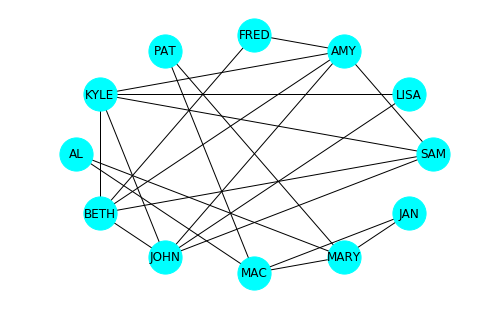

In [4]:
nx.draw_circular(G, node_color='cyan', node_size = 1100, with_labels=True);

As the next cell shows, the graph __G__ is actually the disjoint union of 2 other graphs (we say that each of the two other graphs is a _component_ of G.  

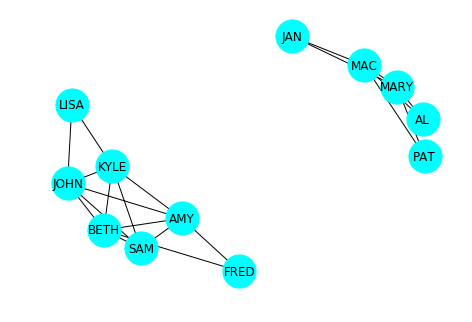

In [5]:
nx.draw(G, node_color='cyan', node_size = 1100, with_labels=True)

The _incidence matrix_ of the graph is a matrix whose rows are labeled by edges and whose columns are labeled by vertices.    Assume an orientation on the edges (for convenience -- can justify doing so theoretically but not worth the effort right now).  Then each row has a -1 in the column corresponding to the initial vertex of the edge, and a 1 in the column corresponding to the final vertex of the edge.  

Below we produce the incidence matrix for the graph __G__ defined above. 

In [6]:
S = nx.incidence_matrix(G,oriented = True).T.todense()
S

matrix([[-1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  

At this point, we are facing a potentially "huge" problem.  Namely, the matrix above does not allow us to keep track of which vertices are which.  

Consequently, we instead will define the incidence matrix as a __DataFrame__ (in pandas) whose column headings are the nodes (vertices) of the graph. 

In [7]:
S = DataFrame( S, columns = G.nodes(), dtype = int)
S

SAM  LISA  AMY  FRED  PAT  KYLE  AL  BETH  JOHN  MAC  MARY  JAN
0    -1     0    0     0    0     1   0     0     0    0     0    0
1    -1     0    0     0    0     0   0     1     0    0     0    0
2    -1     0    1     0    0     0   0     0     0    0     0    0
3    -1     0    0     0    0     0   0     0     1    0     0    0
4     0    -1    0     0    0     1   0     0     0    0     0    0
5     0    -1    0     0    0     0   0     0     1    0     0    0
6     0     0   -1     0    0     1   0     0     0    0     0    0
7     0     0   -1     0    0     0   0     1     0    0     0    0
8     0     0   -1     1    0     0   0     0     0    0     0    0
9     0     0   -1     0    0     0   0     0     1    0     0    0
10    0     0    0    -1    0     0   0     1     0    0     0    0
11    0     0    0     0   -1     0   0     0     0    1     0    0
12    0     0    0     0   -1     0   0     0     0    0     1    0
13    0     0    0     0    0    -1   0     1     0    0     0    0
14    0     0    0     0    0    -1   0     0     1    0     0    0
15    0     0    0     0    0     0  -1     0     0    1     0    0
16    0     0    0     0    0     0  -1     0     0    0     1    0
17    0     0    0     0    0     0   0    -1     1    0     0    0
18    0     0    0     0    0     0   0     0     0   -1     0    1
19    0     0    0     0    0     0   0     0     0   -1     1    0
20    0     0    0     0    0     0   0     0     0    0    -1    1

Some important things to note.  First off, the sum of each row is 0. This is _very important_ and will be used extensively later. 

Second, the svd of $S$ is of the form $ S = U \tilde{\Sigma} V^* $ where 

$$ S^TS = V \Sigma^2 V^* $$

We define $ L = S^TS $ and define it to be the _Laplacian_ of the graph.  Let's define it, for example, for our graph.  

In [8]:
L = (S.T).dot(S)  # DataFrame is an array, so we use .dot() when multiplying
L

SAM  LISA  AMY  FRED  PAT  KYLE  AL  BETH  JOHN  MAC  MARY  JAN
SAM     4     0   -1     0    0    -1   0    -1    -1    0     0    0
LISA    0     2    0     0    0    -1   0     0    -1    0     0    0
AMY    -1     0    5    -1    0    -1   0    -1    -1    0     0    0
FRED    0     0   -1     2    0     0   0    -1     0    0     0    0
PAT     0     0    0     0    2     0   0     0     0   -1    -1    0
KYLE   -1    -1   -1     0    0     5   0    -1    -1    0     0    0
AL      0     0    0     0    0     0   2     0     0   -1    -1    0
BETH   -1     0   -1    -1    0    -1   0     5    -1    0     0    0
JOHN   -1    -1   -1     0    0    -1   0    -1     5    0     0    0
MAC     0     0    0     0   -1     0  -1     0     0    4    -1   -1
MARY    0     0    0     0   -1     0  -1     0     0   -1     4   -1
JAN     0     0    0     0    0     0   0     0     0   -1    -1    2

The Laplacian matrix $L$ is incredibly important for us.  Indeed, it can tell us _everything_ we might want to know about the graph.  

First, however, let's explore some initial properties of $L$.  

To begin with, the rows _and_ the columns sum to 0, and in fact, $L$ is positive semi-definite and thus symmetric since it only contains real numbers.    

In [9]:
L.sum(axis = 0)

SAM     0
LISA    0
AMY     0
FRED    0
PAT     0
KYLE    0
AL      0
BETH    0
JOHN    0
MAC     0
MARY    0
JAN     0
dtype: int64

Second, the diagonal is equal to the number of vertices (i.e., the "neighborhood") that the given vertex is connected to ( = adjacent to).  To see why, notice that if we write 

$$ S = \left[ \mathbf{ve}_1 | ... | \mathbf{ve}_n \right], $$

then each "vertex-edges" vector $\mathbf{ve}_j$ is zero except for a $\pm 1$ where that vertex either begins or ends an edge.  The diagonal of $S^T S$ is formed by the inner products 

$$ \left\Vert \mathbf{ve}_j \right\Vert^2_2 = \mathbf{ve}_j^* \mathbf{ve}_j = ... + (1)^2 + ... + (-1)^2 + ... $$

which in turn is a _count_ of the number of vertices the $j^{th}$ vertex is adjacent to. Similarly, $\mathbf{ve}_j^* \mathbf{ve}_k$ is nonzero only if an edge starts at one and ends at the other, in which case the inner product is -1. 

__THEOREM:__  $L = D - A$, where $D$ is the diagonal matrix of _degrees_ of vertices of the graph $G$ and $A$ is the adjacency matrix of $G$. 

In [10]:
A = nx.to_pandas_dataframe(G).astype(int)
A

SAM  LISA  AMY  FRED  PAT  KYLE  AL  BETH  JOHN  MAC  MARY  JAN
SAM     0     0    1     0    0     1   0     1     1    0     0    0
LISA    0     0    0     0    0     1   0     0     1    0     0    0
AMY     1     0    0     1    0     1   0     1     1    0     0    0
FRED    0     0    1     0    0     0   0     1     0    0     0    0
PAT     0     0    0     0    0     0   0     0     0    1     1    0
KYLE    1     1    1     0    0     0   0     1     1    0     0    0
AL      0     0    0     0    0     0   0     0     0    1     1    0
BETH    1     0    1     1    0     1   0     0     1    0     0    0
JOHN    1     1    1     0    0     1   0     1     0    0     0    0
MAC     0     0    0     0    1     0   1     0     0    0     1    1
MARY    0     0    0     0    1     0   1     0     0    1     0    1
JAN     0     0    0     0    0     0   0     0     0    1     1    0

In [11]:
D = linalg.diagsvd( [ deg[1] for deg in G.degree_iter() ], len(L), len(L) )
D - A

SAM  LISA  AMY  FRED  PAT  KYLE  AL  BETH  JOHN  MAC  MARY  JAN
SAM     4     0   -1     0    0    -1   0    -1    -1    0     0    0
LISA    0     2    0     0    0    -1   0     0    -1    0     0    0
AMY    -1     0    5    -1    0    -1   0    -1    -1    0     0    0
FRED    0     0   -1     2    0     0   0    -1     0    0     0    0
PAT     0     0    0     0    2     0   0     0     0   -1    -1    0
KYLE   -1    -1   -1     0    0     5   0    -1    -1    0     0    0
AL      0     0    0     0    0     0   2     0     0   -1    -1    0
BETH   -1     0   -1    -1    0    -1   0     5    -1    0     0    0
JOHN   -1    -1   -1     0    0    -1   0    -1     5    0     0    0
MAC     0     0    0     0   -1     0  -1     0     0    4    -1   -1
MARY    0     0    0     0   -1     0  -1     0     0   -1     4   -1
JAN     0     0    0     0    0     0   0     0     0   -1    -1    2

In [12]:
L

SAM  LISA  AMY  FRED  PAT  KYLE  AL  BETH  JOHN  MAC  MARY  JAN
SAM     4     0   -1     0    0    -1   0    -1    -1    0     0    0
LISA    0     2    0     0    0    -1   0     0    -1    0     0    0
AMY    -1     0    5    -1    0    -1   0    -1    -1    0     0    0
FRED    0     0   -1     2    0     0   0    -1     0    0     0    0
PAT     0     0    0     0    2     0   0     0     0   -1    -1    0
KYLE   -1    -1   -1     0    0     5   0    -1    -1    0     0    0
AL      0     0    0     0    0     0   2     0     0   -1    -1    0
BETH   -1     0   -1    -1    0    -1   0     5    -1    0     0    0
JOHN   -1    -1   -1     0    0    -1   0    -1     5    0     0    0
MAC     0     0    0     0   -1     0  -1     0     0    4    -1   -1
MARY    0     0    0     0   -1     0  -1     0     0   -1     4   -1
JAN     0     0    0     0    0     0   0     0     0   -1    -1    2

Finally, since $L$ is positive-semidefinite, its svd is the same as its Schur decomposition is the same as its diagonalization, and the eigenvalues of $L$ are also its singular values.  However, we use the __svd__ exclusively to study $L$ because it returns the eigenvalues of $L$ (i.e., the singular values) in _descending order_ (eigenvalue decompositions often do not). 

In [13]:
V, Sigma, Vt = linalg.svd(L)
Sigma

array([ 6.44949,  6.     ,  6.     ,  5.41421,  5.     ,  5.     ,
        2.58579,  2.     ,  2.     ,  1.55051,  0.     ,  0.     ])

There are two zero singular values.  That means that the kernel of $L$ is 2-dimensional and the basis for the kernel is the last 2 columns of $V$, or equivalently, the last two rows of $Vt$.  

The first vector in the kernel is obvious.  Namely, if $\mathbf{1}$ denotes the vector of all 1's (every coefficient is 1), then 
$$ L\mathbf{1} = \mathbf{ L.sum(axis = 0 ) } = \mathbf{0} $$
Thus, $\mathbf{1} \in ker(L)$. 

In [14]:
Ones = np.ones( (len(L),) )
L.dot( Ones )

SAM    0
LISA   0
AMY    0
FRED   0
PAT    0
KYLE   0
AL     0
BETH   0
JOHN   0
MAC    0
MARY   0
JAN    0
dtype: float64

A second vector in the basis for $ker(L)$ independent of $\mathbf{1}$ is the _Fiedler Vector_ and it is a linear combination of the last two columns of $V$ that is orthogonal to $\mathbf{1}$.  A simple way to do so is to define 

$$ Fiedler = ( \mathbf{v}_{n-1} ^* \mathbf{1} ) \mathbf{v}_n - ( \mathbf{v}_{n} ^* \mathbf{1} ) \mathbf{v}_{n-1} $$

since clearly $Fiedler \in span(\mathbf{v}_{n-1} ,  \mathbf{v}_n)$ and 

$$Fielder^* \mathbf{1} = ( \mathbf{v}_{n-1} ^* \mathbf{1} ) ( \mathbf{v}_n ^* \mathbf{1} ) -  (\mathbf{v}_n ^* \mathbf{1} )( \mathbf{v}_{n-1} ^* \mathbf{1} ) =  0$$
as we do below:

In [15]:
Fiedler = ( V[:,-2].dot(Ones) ) * V[:,-1] - (V[:,-1].dot(Ones) ) * V[:,-2] 
Fiedler

array([-0.84515, -0.84515, -0.84515, -0.84515,  1.18322, -0.84515,
        1.18322, -0.84515, -0.84515,  1.18322,  1.18322,  1.18322])

Each coefficient in $Fiedler$ is one of only 2 numbers -- one negative and one positive.  Indeed, $Fielder^* \mathbf{1}=0$ means that the sum of all the numbers is 0, so some distribution of positive and negatives is necessary.  However, the graph $G$ we are considering is actually made of 2 separate graphs -- i.e., two _components_, and $L$ restricted to each component must be the _Laplacian_ of that component.  

Thus, the Fiedler vector is actually two vectors -- each of which is constant on the two components, respectively.  Consequently, the Fielder vector actually tells us what the two components of the graph are. 

In [16]:
DataFrame(Fiedler.reshape((1,-1)), columns = L.columns)

SAM     LISA      AMY     FRED     PAT     KYLE      AL     BETH  \
0 -0.84515 -0.84515 -0.84515 -0.84515 1.18322 -0.84515 1.18322 -0.84515   

      JOHN     MAC    MARY     JAN  
0 -0.84515 1.18322 1.18322 1.18322

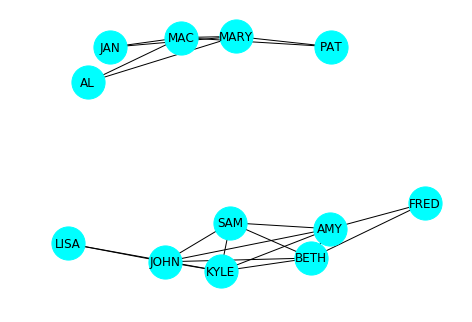

In [17]:
nx.draw(G, node_color='cyan', node_size = 1100, with_labels=True)

In [18]:
Component1 = L.columns[ Fiedler > 0 ]
Component1

Index(['PAT', 'AL', 'MAC', 'MARY', 'JAN'], dtype='object')

In [19]:
Component2 = L.columns[ Fiedler < 0 ]
Component2

Index(['SAM', 'LISA', 'AMY', 'FRED', 'KYLE', 'BETH', 'JOHN'], dtype='object')

<p>&nbsp;</p>

## Spectral Clustering

Let's put this to work.  If we have a graph with 2 highly connected components, then adding a single edge will only change the Laplacian slightly -- and thus, it will only change the _Fiedler Vector_ slightly.  Consequently, 

<h3 align = 'center' style = "color:blue"> If a graph _G_ can be thought of as having two highly connected components <br/>with a few edges between them, then the Fiedler vector <br/>can be used to identify those components</h3>

In reality, they are no longer components but instead are called _clusters_ of the graph $G$.  Using the _Fiedler vector_ to _ __partition__ _ a graph into two clusters is a special case of the field of data science known as _Spectral Clustering_.  

Let's add an edge between our two graphs and see Spectral Clustering in action!!! 

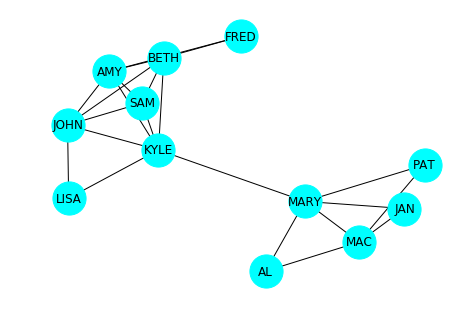

In [20]:
G.add_edge('KYLE', 'MARY')
nx.draw(G, node_color='cyan', node_size = 1100, with_labels=True)

Below we produce the Laplacian matrix for the graph __G__ defined above (skip incidence and cut to the chase!) 

In [21]:
nx.laplacian_matrix(G)

<12x12 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [22]:
L = nx.laplacian_matrix(G).todense()     # default is a sparse matrix
L = DataFrame( L, columns = G.nodes() )  # To track vertices
L

SAM  LISA  AMY  FRED  PAT  KYLE  AL  BETH  JOHN  MAC  MARY  JAN
0     4     0   -1     0    0    -1   0    -1    -1    0     0    0
1     0     2    0     0    0    -1   0     0    -1    0     0    0
2    -1     0    5    -1    0    -1   0    -1    -1    0     0    0
3     0     0   -1     2    0     0   0    -1     0    0     0    0
4     0     0    0     0    2     0   0     0     0   -1    -1    0
5    -1    -1   -1     0    0     6   0    -1    -1    0    -1    0
6     0     0    0     0    0     0   2     0     0   -1    -1    0
7    -1     0   -1    -1    0    -1   0     5    -1    0     0    0
8    -1    -1   -1     0    0    -1   0    -1     5    0     0    0
9     0     0    0     0   -1     0  -1     0     0    4    -1   -1
10    0     0    0     0   -1    -1  -1     0     0   -1     5   -1
11    0     0    0     0    0     0   0     0     0   -1    -1    2

Again, we have the same properties, such as $L = D-A$ and each row of $L$ sums to 0.     

In [23]:
L.sum(axis = 0)

SAM     0
LISA    0
AMY     0
FRED    0
PAT     0
KYLE    0
AL      0
BETH    0
JOHN    0
MAC     0
MARY    0
JAN     0
dtype: int64

Let's look at the SVD. 

In [24]:
V, Sigma, Vt = linalg.svd(L)
Sigma

array([ 7.4385 ,  6.29496,  6.     ,  5.52624,  5.30889,  5.     ,
        2.60579,  2.     ,  2.     ,  1.56927,  0.25634,  0.     ])

Only one singular value equal to 0 means that the graph is __connected__ (i.e., only one component).  It also means that the last row in $V^T$ is constant ( = a multiple of __1__ whose norm is 1). 

In [25]:
Vt[-1]  # = ones vector divided by either plus or minus sqrt(12)

array([-0.28868, -0.28868, -0.28868, -0.28868, -0.28868, -0.28868,
       -0.28868, -0.28868, -0.28868, -0.28868, -0.28868, -0.28868])

In [26]:
1/Vt[-1]**2

array([ 12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,
        12.])

And the next to the last row is the Fiedler vector. 

In [27]:
Fiedler = Vt[-2]; Fiedler

array([ 0.246  ,  0.23698,  0.25387,  0.29119, -0.35734,  0.16878,
       -0.35734,  0.25387,  0.24443, -0.35734, -0.26574, -0.35734])

It is no longer limited to only two entries, but the sign of the Fiedler vector is useful -- i.e., positives imply one cluster and negatives imply the other. 

In [28]:
Component1 = L.columns[ Fiedler > 0 ]
Component1

Index(['SAM', 'LISA', 'AMY', 'FRED', 'KYLE', 'BETH', 'JOHN'], dtype='object')

In [29]:
Component2 = L.columns[ Fiedler < 0 ]
Component2

Index(['PAT', 'AL', 'MAC', 'MARY', 'JAN'], dtype='object')

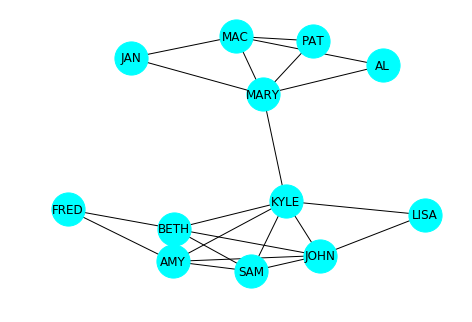

In [30]:
nx.draw(G, node_color='cyan', node_size = 1100, with_labels=True)

The same idea can be used to cluster into more than 2 clusters, but doing so means using more rows of $V^T$.  A lot of programming, but not difficult to see how it works ( e.g., if graph is two components each of which has 2 obvious clusters, then the entire graph can be split into 4 clusters using the last 3 rows of $V^T$. Three clusters simply means one of the components does not split into clusters.  )

But we are going to stick with 2 clusters in this assignment.  

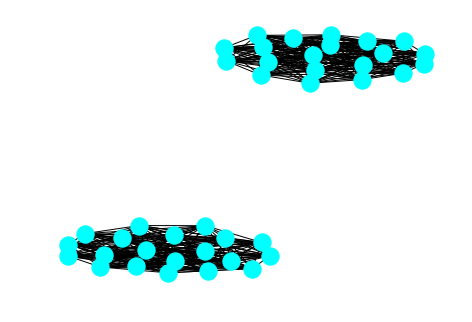

In [31]:
C = nx.complete_graph(20)
D = nx.complete_graph(20)
CD = nx.union(C,D, rename = ('C','D'))
nx.draw(CD, node_color='cyan')

In [32]:
L = nx.laplacian_matrix(CD).todense()     # default is a sparse matrix
L = DataFrame( L, columns = CD.nodes() )  # To track vertices
L.head()

C19  C11  D0  C2  D10  C18  C13  D14  C17  C5 ...  C7  C16  C14  D7  D5  \
0   19   -1   0  -1    0   -1   -1    0   -1  -1 ...  -1   -1   -1   0   0   
1   -1   19   0  -1    0   -1   -1    0   -1  -1 ...  -1   -1   -1   0   0   
2    0    0  19   0   -1    0    0   -1    0   0 ...   0    0    0  -1  -1   
3   -1   -1   0  19    0   -1   -1    0   -1  -1 ...  -1   -1   -1   0   0   
4    0    0  -1   0   19    0    0   -1    0   0 ...   0    0    0  -1  -1   

   C1  C6  D19  D8  D9  
0  -1  -1    0   0   0  
1  -1  -1    0   0   0  
2   0   0   -1  -1  -1  
3  -1  -1    0   0   0  
4   0   0   -1  -1  -1  

[5 rows x 40 columns]

In [33]:
V, Sigma, Vt = linalg.svd(L)
Sigma

array([ 20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,   0.,   0.])

In [34]:
Ones = np.ones((len(V),1))
Fiedler = ( V[:,-2].dot(Ones) ) * V[:,-1] - (V[:,-1].dot(Ones) ) * V[:,-2] 
Fiedler

array([ 1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,
       -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.])

In [35]:
Component1 = L.columns[ Fiedler > 0 ]
Component1

Index(['C19', 'C11', 'C2', 'C18', 'C13', 'C17', 'C5', 'C4', 'C12', 'C8', 'C10',
       'C15', 'C3', 'C0', 'C9', 'C7', 'C16', 'C14', 'C1', 'C6'],
      dtype='object')

In [36]:
Component2 = L.columns[ Fiedler < 0 ]
Component2

Index(['D0', 'D10', 'D14', 'D13', 'D1', 'D17', 'D15', 'D2', 'D18', 'D6', 'D3',
       'D4', 'D16', 'D12', 'D11', 'D7', 'D5', 'D19', 'D8', 'D9'],
      dtype='object')

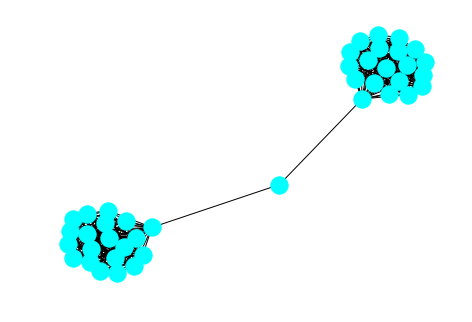

In [37]:
CD.add_edge('C0', 'u')
CD.add_edge('D0', 'u')
nx.draw(CD, node_color='cyan')

In [38]:
L = nx.laplacian_matrix(CD).todense()     # default is a sparse matrix
L = DataFrame( L, columns = CD.nodes() )  # To track vertices
L.head()

C19  C11  D0  C2  D10  C18  C13  D14  C17  C5 ...  C7  C16  C14  D7  D5  \
0   19   -1   0  -1    0   -1   -1    0   -1  -1 ...  -1   -1   -1   0   0   
1   -1   19   0  -1    0   -1   -1    0   -1  -1 ...  -1   -1   -1   0   0   
2    0    0  20   0   -1    0    0   -1    0   0 ...   0    0    0  -1  -1   
3   -1   -1   0  19    0   -1   -1    0   -1  -1 ...  -1   -1   -1   0   0   
4    0    0  -1   0   19    0    0   -1    0   0 ...   0    0    0  -1  -1   

   C1  C6  D19  D8  D9  
0  -1  -1    0   0   0  
1  -1  -1    0   0   0  
2   0   0   -1  -1  -1  
3  -1  -1    0   0   0  
4   0   0   -1  -1  -1  

[5 rows x 41 columns]

In [39]:
V, Sigma, Vt = linalg.svd(L)
Sigma

array([ 21.05249,  20.95227,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,   1.94751,   0.04773,   0.     ])

In [40]:
Fiedler = V[:,-2]
DataFrame(Fiedler.reshape((1,-1)), columns = L.columns)

C19     C11       D0      C2      D10     C18     C13      D14     C17  \
0 0.15848 0.15848 -0.15092 0.15848 -0.15848 0.15848 0.15848 -0.15848 0.15848   

       C5   ...         C7     C16     C14       D7       D5      C1      C6  \
0 0.15848   ...    0.15848 0.15848 0.15848 -0.15848 -0.15848 0.15848 0.15848   

       D19       D8       D9  
0 -0.15848 -0.15848 -0.15848  

[1 rows x 41 columns]

In [41]:
Component1 = L.columns[ Fiedler > 0 ]
Component1

Index(['C19', 'C11', 'C2', 'C18', 'C13', 'C17', 'C5', 'C4', 'C12', 'C8', 'C10',
       'C15', 'C3', 'C0', 'C9', 'C7', 'C16', 'C14', 'C1', 'C6'],
      dtype='object')

In [42]:
Component2 = L.columns[ Fiedler < 0 ]
Component2

Index(['D0', 'D10', 'D14', 'D13', 'D1', 'D17', 'D15', 'D2', 'D18', 'D6', 'D3',
       'D4', 'D16', 'D12', 'u', 'D11', 'D7', 'D5', 'D19', 'D8', 'D9'],
      dtype='object')

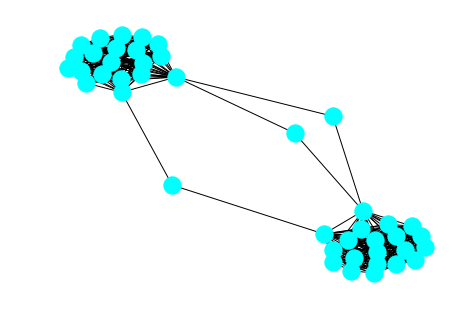

In [43]:
CD.add_edge('C1', 'v')
CD.add_edge('D1', 'v')
CD.add_edge('C1', 'w')
CD.add_edge('D1', 'w')

nx.draw(CD, node_color='cyan')

In [44]:
L = nx.laplacian_matrix(CD).todense()     # default is a sparse matrix
L = DataFrame( L, columns = CD.nodes() )  # To track vertices
L.head()

C19  C11  D0  C2  D10  v  C18  C13  D14  C17 ...  C7  C16  C14  D7  D5  C1  \
0   19   -1   0  -1    0  0   -1   -1    0   -1 ...  -1   -1   -1   0   0  -1   
1   -1   19   0  -1    0  0   -1   -1    0   -1 ...  -1   -1   -1   0   0  -1   
2    0    0  20   0   -1  0    0    0   -1    0 ...   0    0    0  -1  -1   0   
3   -1   -1   0  19    0  0   -1   -1    0   -1 ...  -1   -1   -1   0   0  -1   
4    0    0  -1   0   19  0    0    0   -1    0 ...   0    0    0  -1  -1   0   

   C6  D19  D8  D9  
0  -1    0   0   0  
1  -1    0   0   0  
2   0   -1  -1  -1  
3  -1    0   0   0  
4   0   -1  -1  -1  

[5 rows x 43 columns]

In [45]:
V, Sigma, Vt = linalg.svd(L)
Sigma

array([ 22.10417,  21.91307,  21.04729,  20.9475 ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,  20.     ,  20.     ,  20.     ,  20.     ,
        20.     ,  20.     ,   2.     ,   2.     ,   1.84854,   0.13943,
         0.     ])

In [46]:
Fiedler = V[:,-2]
DataFrame(Fiedler.reshape((1,-1)), columns = L.columns)

C19      C11      D0       C2     D10  v      C18      C13     D14  \
0 -0.15918 -0.15918 0.15155 -0.15918 0.15918  0 -0.15918 -0.15918 0.15918   

       C17   ...         C7      C16      C14      D7      D5       C1  \
0 -0.15918   ...   -0.15918 -0.15918 -0.15918 0.15918 0.15918 -0.14462   

        C6     D19      D8      D9  
0 -0.15918 0.15918 0.15918 0.15918  

[1 rows x 43 columns]

In [47]:
DataFrame(Fiedler.reshape((1,-1)), columns = L.columns)[['C0','D0','C1','D1','C2','D2','u','v','w']]

C0      D0       C1      D1       C2      D2  u  v  w
0 -0.15155 0.15155 -0.14462 0.14462 -0.15918 0.15918  0  0  0

What if the data does not come in the form of a Graph?  Let's look first at a very simple example extracted from the __scikit learn__ documentation: 

The key is that we can always use some version of __ _k_ Nearest Neighbors__ to construct a graph (network) representation of a data set. 

In [48]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

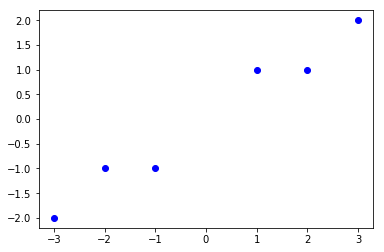

In [49]:
plt.plot(X[:,0], X[:,1], 'bo')

In [50]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')
nbrs.fit(X)
nbrs

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=3, p=2, radius=1.0)

In [51]:
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]])

In [52]:
vertNbrs = dict( [ (itm[0],itm[1:]) for itm in indices] )
vertNbrs

{0: array([1, 2]),
 1: array([0, 2]),
 2: array([1, 0]),
 3: array([4, 5]),
 4: array([3, 5]),
 5: array([4, 3])}

(-1.2100000000000002,
 1.2100000000000002,
 -1.0478907385791711,
 1.0478907385791709)

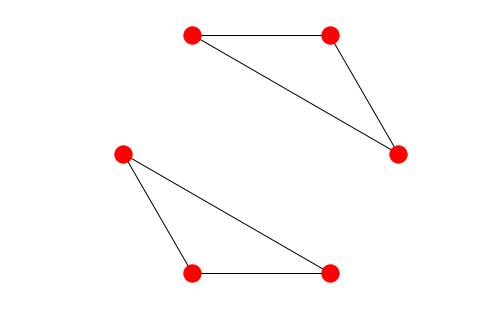

In [53]:
G = nx.Graph(vertNbrs)
nx.draw_circular(G)
plt.axis('equal')

In [54]:
# In general, graph array is not symmetric
A = nbrs.kneighbors_graph(X).todense()
A

matrix([[ 1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.]])

In [55]:
A = A - diag(diag(A))
A

matrix([[ 0.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  0.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  0.]])

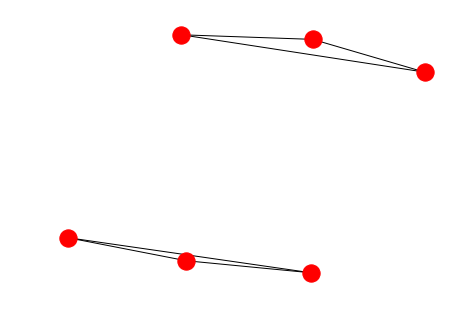

In [56]:
G = nx.Graph(A)
nx.draw(G)

Spectral Clustering is also often applied to Data, often by using nearest neighbor approaches to define a graph after which spectral clustering is applied to the graph, thus implying a clustering also of the data. 

We will be doing such an application starting on Friday as one part of Assignment 5. 

In [57]:
from numpy import pi, cos, sin
npts = 1000

r = np.random.rand(npts)
theta = 2 * pi * np.random.rand(npts)

Cdat = np.vstack( [r*cos(theta) - 2, r*sin(theta)])  

r = np.random.rand(npts)
theta = 2 * pi * np.random.rand(npts)

Ddat = np.vstack( [r*cos(theta) + 2, r*sin(theta)] )

CDdat = np.append( Cdat,Ddat, axis=1 ).T
CDdat = np.append( CDdat, np.array([0,0]).reshape((1,-1)), axis = 0)

CDdf = DataFrame(CDdat, columns = ['x','y'])

CDdf.tail()

x        y
1996 2.06268 -0.05785
1997 1.84705  0.37318
1998 1.99964  0.07172
1999 1.97086  0.45256
2000       0        0

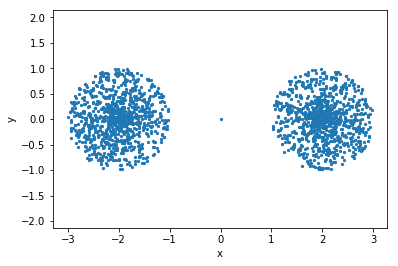

In [58]:
CDdf.plot.scatter('x','y', s = 5)
plt.axis('equal');

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(CDdf)
kmeans.cluster_centers_

array([[-2.0115 ,  0.01497],
       [ 2.00654, -0.00244]])

In [60]:
DataFrame( kmeans.labels_ ).T

0     1     2     3     4     5     6     7     8     9     ...   1991  \
0     0     0     0     0     0     0     0     0     0     0  ...      1   

   1992  1993  1994  1995  1996  1997  1998  1999  2000  
0     1     1     1     1     1     1     1     1     1  

[1 rows x 2001 columns]

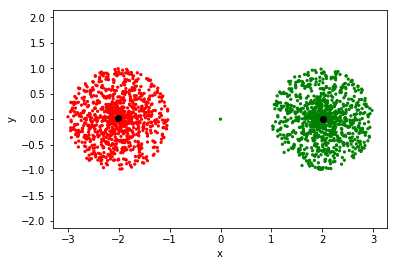

In [61]:
CDdf.plot.scatter('x','y', s = 5, c = [ ['red','green'][lbl] for lbl in kmeans.labels_ ] )
plt.plot( *kmeans.cluster_centers_.T, 'ko')
plt.axis('equal');

In [62]:
CDdf = DataFrame(CDdat, columns = ['x','y'])
for i in range(10):
    CDdf.loc[2*npts+1+i] = [ 0,  2*np.random.rand()-1]

CDdf.tail(15)

x        y
1996 2.06268 -0.05785
1997 1.84705  0.37318
1998 1.99964  0.07172
1999 1.97086  0.45256
2000       0        0
2001       0  0.87189
2002       0 -0.60559
2003       0  0.97031
2004       0  0.82384
2005       0 -0.88600
2006       0 -0.74057
2007       0 -0.96163
2008       0  0.33754
2009       0  0.49373
2010       0 -0.11968

In [63]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(CDdf)
kmeans.cluster_centers_

array([[-2.0115 ,  0.01497],
       [ 1.98669, -0.00223]])

In [64]:
DataFrame( kmeans.labels_ ).T

0     1     2     3     4     5     6     7     8     9     ...   2001  \
0     0     0     0     0     0     0     0     0     0     0  ...      1   

   2002  2003  2004  2005  2006  2007  2008  2009  2010  
0     1     1     1     1     1     1     1     1     1  

[1 rows x 2011 columns]

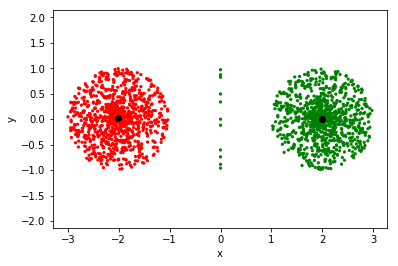

In [65]:
CDdf.plot.scatter('x','y', s = 5, c = [ ['red','green'][lbl] for lbl in kmeans.labels_ ] )
plt.plot( *kmeans.cluster_centers_.T, 'ko')
plt.axis('equal');

Now let's use our spectral clustering approach, augmented by mapping coefficients sufficiently close to 0 to an additional "unassociated" category (note: unassociated points do not necessarily form a 3rd cluster!! )

In [66]:
nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree')
nbrs.fit(CDdf)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=11, p=2, radius=1.0)

In [67]:
distances, indices = nbrs.kneighbors(CDdf) # graph based on original data
indices

array([[   0,  687,  872, ...,  769,  121,  766],
       [   1,  535,  469, ...,  393,  574,  969],
       [   2,  707,  158, ...,  693,  831,  619],
       ..., 
       [2008, 2009, 2000, ...,  227,  592, 1507],
       [2009, 2008, 2004, ...,  227,  592, 2002],
       [2010, 2000, 2008, ..., 2004, 2001, 1492]])

In [68]:
vertNbrs = dict( [ (itm[0],itm[1:]) for itm in indices] )  #BIG -- not going to show it

In [69]:
G = nx.Graph(vertNbrs)
G

In [72]:
clrs = [ ['cyan','red'][ i % 2] for i in range(G.order()) ]

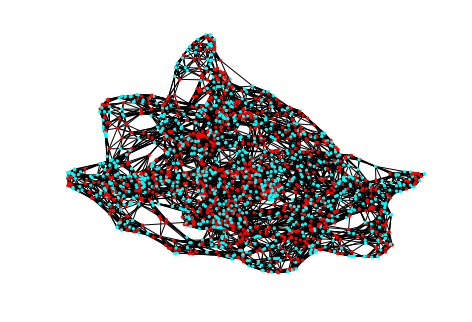

In [73]:
nx.draw(G, node_color = clrs, node_size= 5)

In [32]:
L = nx.laplacian_matrix(G).todense()     # default is a sparse matrix
L = DataFrame( L, columns = G.nodes() )  # To track vertices
L.head()

0     1     2     3     4     5     6     7     8     9     ...   2001  \
0    11     0     0     0     0     0     0     0     0     0  ...      0   
1     0    12     0     0     0     0     0     0     0     0  ...      0   
2     0     0    11     0     0     0     0     0     0     0  ...      0   
3     0     0     0    11     0     0     0     0     0     0  ...      0   
4     0     0     0     0    10     0     0     0     0     0  ...      0   

   2002  2003  2004  2005  2006  2007  2008  2009  2010  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 2011 columns]

In [33]:
V, Sigma, Vt = linalg.svd(L)  #The QR algorithm IS NOT FAST! 
Sigma

array([ 22.04596,  21.37136,  20.87963, ...,   0.06744,   0.00425,   0.     ])

In [34]:
Sigma[-10:]

array([ 0.21612,  0.20107,  0.11688,  0.11011,  0.0863 ,  0.07546,
        0.07151,  0.06744,  0.00425,  0.     ])

In [35]:
Fiedler = V[:,-2]
DataFrame(Fiedler.reshape((1,-1)), columns = L.columns)

0       1       2       3       4       5       6       7       8     \
0 0.02159 0.02324 0.01780 0.01991 0.02484 0.02450 0.02239 0.02461 0.02487   

     9      ...      2001    2002    2003    2004    2005    2006    2007  \
0 0.02372   ...   0.00101 0.00418 0.00279 0.00321 0.00321 0.00445 0.00243   

     2008    2009    2010  
0 0.00279 0.00279 0.00101  

[1 rows x 2011 columns]

(array([ 820.,  146.,   34.,    0.,    0.,   11.,    0.,   51.,  133.,  816.]),
 array([-0.02489, -0.01989, -0.0149 , -0.0099 , -0.0049 ,  0.0001 ,
         0.0051 ,  0.0101 ,  0.0151 ,  0.0201 ,  0.0251 ]),
 <a list of 10 Patch objects>)

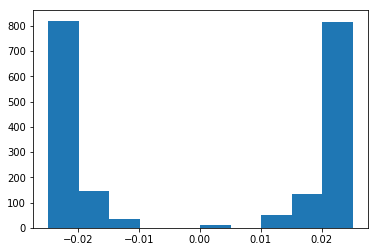

In [36]:
plt.hist(Fiedler)

In [38]:
cutoff = 0.01

In [43]:
y_pred = [] #predicted "label" for each point 
for i in range(len(Fiedler)):
    if( Fiedler[i] > 0):
        y_pred.append('red')
    else:
        y_pred.append('green')

In [49]:
array(y_pred)[ [ i for i in np.random.randint(0,2000,20) ] ]

array(['red', 'red', 'red', 'red', 'green', 'red', 'green', 'green', 'red',
       'green', 'green', 'green', 'green', 'red', 'red', 'green', 'green',
       'red', 'green', 'red'], 
      dtype='<U5')

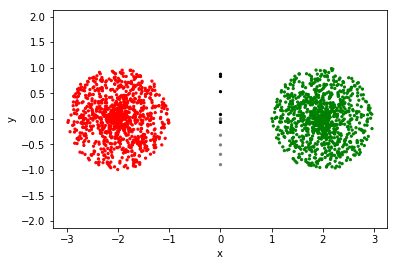

In [40]:
CDdf.plot.scatter('x','y', s = 5, c = y_pred )
plt.axis('equal');

Here is the same data clustered via the __scikit learn__ spectral clustering algorithm in its __cluster__ library. 

<b style = 'color:blue;fontsize:larger'>Note: _We just beat it!_ </b> 

In [41]:
from sklearn import cluster
spectral = cluster.SpectralClustering(n_clusters=2, assign_labels = 'discretize', affinity="nearest_neighbors")
spectral.fit( CDdf )

SpectralClustering(affinity='nearest_neighbors', assign_labels='discretize',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

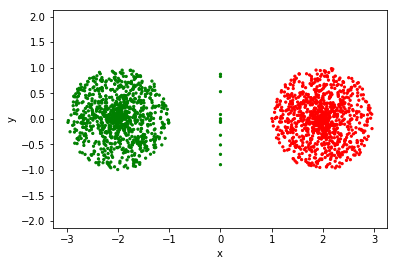

In [42]:
CDdf.plot.scatter('x','y', s = 5, c = [ ['red','green','blue'][lbl] for lbl in spectral.labels_ ] )
plt.axis('equal');